In [1]:
import sys
sys.path.append('..')  # Add the parent folder to the import path
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import re

In [2]:
df = pd.read_csv('../../processed_data/GPT_reasoning_250.csv',dtype=str)

In [3]:
df = df.fillna('')
df['Opioid User Status'].value_counts()

Opioid User Status
Non-Opioid User          136
Opioid User              102
User (Status Unknown)     10
Unknown                    1
Name: count, dtype: int64

In [4]:
import numpy as np
from PIL import Image, ImageDraw

# Define the dimensions of the circular mask image
width, height = 800, 800
# Create a white canvas
mask = Image.new("L", (width, height), 255)
# Create a draw object to draw the circle on the canvas
draw = ImageDraw.Draw(mask)
# Define the center and radius of the circle
center_x, center_y = width // 2, height // 2
radius = min(center_x, center_y) - 10  # Adjust the radius as needed
# Draw a white circle on the canvas with a black background
draw.ellipse((center_x - radius, center_y - radius, center_x + radius, center_y + radius), fill=0)
# ave the circular mask image as a PNG file
mask.save("circle_mask.png")
circle_mask = np.array(Image.open('circle_mask.png'))

In [5]:
all_foods = '; '.join(df['Foods'].tolist())
all_habit = '; '.join(df['Habits'].tolist())
opioid_foods = '; '.join(df[df['Opioid User Status'] == 'Opioid User']['Foods'].tolist())
non_opioid_foods = '; '.join(df[df['Opioid User Status'] == 'Non-Opioid User']['Foods'].tolist())
opioid_habits = '; '.join(df[df['Opioid User Status'] == 'Opioid User']['Habits'].tolist())
non_opioid_habits = '; '.join(df[df['Opioid User Status'] == 'Non-Opioid User']['Habits'].tolist())

In [19]:
words_to_remove = ['Chicken', 'chicken', 'NFS', 'cooked', 'added', 'N', 'fat', 'raw', 'skin', 'NS', 'N ', 'cooking', 'eaten', 'type', 'white']

In [20]:
def remove_words(text, words_to_remove):
    for word in words_to_remove:
        text = re.sub(r'\b' + re.escape(word) + r'\b', '', text)
    return text

def generate_word_cloud(text, words_to_remove, random_state=42, colormap='gray', is_save=False, save_path=None):
    text = remove_words(text, words_to_remove)
    wordcloud = WordCloud(width=800, height=800, max_font_size=100, min_font_size=10, random_state=random_state, mask=circle_mask, max_words=400,
                          colormap=colormap, relative_scaling=0.5, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    if is_save:
        wordcloud.to_file(save_path)

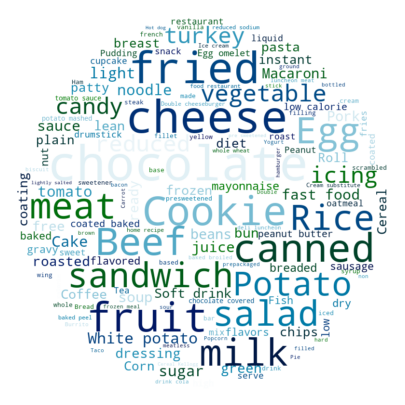

In [21]:
generate_word_cloud(opioid_foods, words_to_remove, random_state=43, colormap='ocean', is_save=False, save_path='../figures/word_cloud_non_opioid_foods.png')

In [22]:
habit_words_to_remove = ['less', 'more', 'Eats little ', 'eat meals', 'eats', 'Eats lots', 'nutrition info', 'preparation', 'average', 'Ate food', 'claims', 'check',
                         'Drinks lots', 'Drinks little', 'Eats', 'Claims']

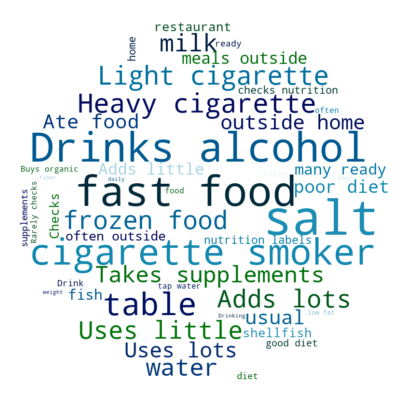

In [27]:
generate_word_cloud(opioid_habits, habit_words_to_remove, random_state=44, colormap='ocean', is_save=False, save_path='../figures/word_cloud_non_opioid_habits.png')